In [394]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.layers import Dense , Input , Flatten

from tensorflow.keras.callbacks import EarlyStopping

import warnings

warnings.filterwarnings('ignore')

In [395]:
training=pd.read_csv('emnist-balanced-train.csv',header=None)
testing=pd.read_csv('emnist-balanced-test.csv',header=None)

training
#training[1][-1]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [396]:
y_train = training.iloc[:,0]
x_train = training.iloc[:,1:]
#testing_labels
y_test = testing.iloc[:,0]
x_test = testing.iloc[:,1:]
print(y_train.shape)   
print(x_train.shape)
print()
print(y_test.shape)   
print(x_test.shape)

(112800,)
(112800, 784)

(18800,)
(18800, 784)


In [397]:
y_train.value_counts()

0
45    2400
7     2400
22    2400
34    2400
9     2400
30    2400
38    2400
39    2400
37    2400
31    2400
16    2400
2     2400
28    2400
8     2400
10    2400
6     2400
27    2400
33    2400
11    2400
18    2400
41    2400
0     2400
23    2400
35    2400
36    2400
13    2400
43    2400
15    2400
4     2400
42    2400
26    2400
32    2400
20    2400
1     2400
46    2400
24    2400
25    2400
12    2400
5     2400
17    2400
3     2400
40    2400
14    2400
44    2400
19    2400
29    2400
21    2400
Name: count, dtype: int64

In [398]:
sample_image = x_train.iloc[4523]
sample_label = y_train.iloc[4523]
sample_image.shape, sample_label

((784,), 30)

Label entry: 30


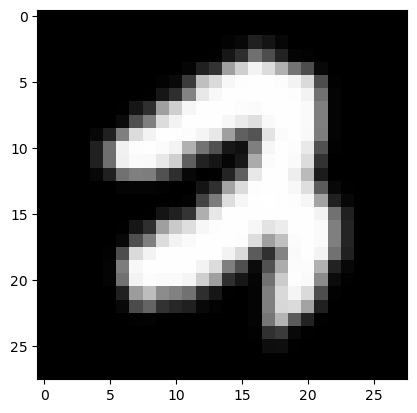

In [399]:
W = 28
H = 28

print("Label entry:", sample_label)
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

In [400]:
label_dictionary={0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [401]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [402]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train.shape

(112800, 28, 28)

In [403]:
x_test = np.apply_along_axis(flip_and_rotate, 1, x_test.values)
x_test.shape

(18800, 28, 28)

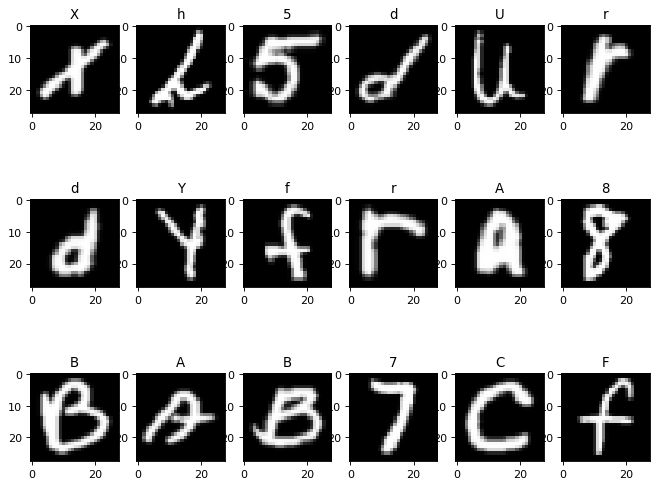

In [404]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

In [405]:
x_train=x_train.reshape(112800,28,28,1)
x_train.shape

(112800, 28, 28, 1)

In [406]:
x_test=x_test.reshape(18800,28,28,1)
x_test.shape

(18800, 28, 28, 1)

In [407]:
x_train=x_train/255
x_test=x_test/255

In [408]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(47,activation='softmax'))

In [409]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [410]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 910,255 (3.47 MB)

 Trainable params: 910,255 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

In [411]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [412]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=22,callbacks=early_stop)

Epoch 1/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.7207 - loss: 0.9183 - val_accuracy: 0.8591 - val_loss: 0.4092
Epoch 2/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.8702 - loss: 0.3611 - val_accuracy: 0.8651 - val_loss: 0.3859
Epoch 3/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.8888 - loss: 0.2964 - val_accuracy: 0.8712 - val_loss: 0.3731
Epoch 4/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9031 - loss: 0.2525 - val_accuracy: 0.8755 - val_loss: 0.3693
Epoch 5/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9119 - loss: 0.2222 - val_accuracy: 0.8761 - val_loss: 0.3708
Epoch 6/10
5128/5128 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9179 - loss: 0.2012 - val_accuracy: 0.8753 - val_loss: 0.4108


In [413]:
model.evaluate(x_test,y_test)

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8737 - loss: 0.4147


[0.41076502203941345, 0.8753191232681274]

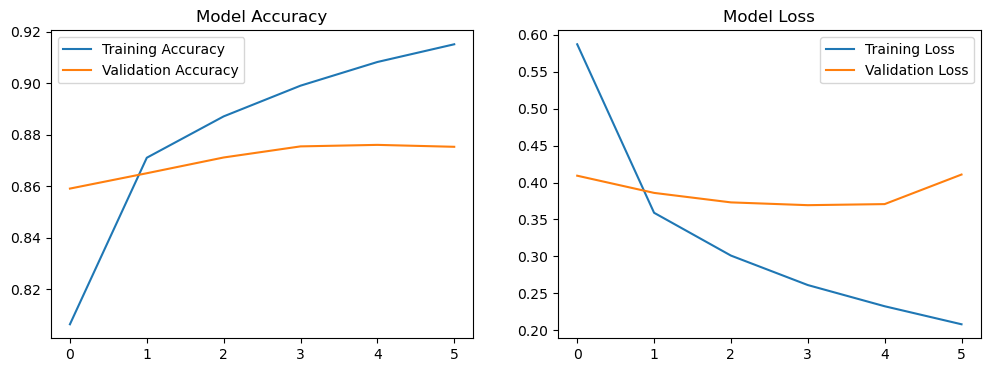

In [414]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()